In [14]:
from processor_new import Processor 

import numpy as np
import pandas as pd

from os import walk
from os import listdir
import datetime

processor = Processor()

In [15]:
raw_data_path = "../lataus/data/lam"
years = listdir(raw_data_path)
print(f"Available years {', '.join(years)}.")

Available years 2016, 2017.


In [16]:
selected_year = "2016"
elys = listdir(f"{raw_data_path}/{selected_year}")
print(f"Available elys {', '.join(elys)}.")

Available elys 01, 02, 03, 04, 08, 09, 12, 14.


In [17]:
selected_ely = "01"

lam_data_files = listdir(f"{raw_data_path}/{selected_year}/{selected_ely}")
lam_ids = set()

for filename in lam_data_files:
    lam_ids.add(filename.split("_")[-1].split(".")[0])

print(f"Available lam ids {', '.join(sorted(lam_ids))}.")

Available lam ids 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 4, 5, 6, 7, 8, 9.


In [18]:
selected_lam = "1"

files = []

for filename in lam_data_files:
    if filename.split("_")[1] == selected_lam:
        files.append(filename)

print(f"{len(files)} file(s) found for lam id {selected_lam}.")

31 file(s) found for lam id 1.


In [19]:
path = f"{raw_data_path}/{selected_year}/{selected_ely}/{files[0]}"
lam_1_day_1 = processor.process_file_in_path(path, 5)

In [20]:
lam_1_day_1_cols = processor.create_columns(lam_1_day_1, processor.PROCESSED_COL_NAMES[2])

In [21]:
# Do it for each lam on the same day and create full matrix
# possibly use threads

In [22]:
data_path = f"{raw_data_path}/{selected_year}"
day_1_files = []

for ely in elys:
    files = listdir(f"{data_path}/{ely}")
    for file in files:
        if file.split("_")[-1].split(".")[0] == "1":
            day_1_files.append(f"{data_path}/{ely}/{file}")

In [23]:
len(day_1_files)

391

In [27]:
start = time.time()


result = processor.create_columns(processor.process_file_in_path(day_1_files.pop(), 5), processor.PROCESSED_COL_NAMES[-1])
errored = None
i = 0
for file in day_1_files:
    if i % 10 == 0:
        print(f"{i} done")

    i += 1
    lam_data = processor.process_file_in_path(file, 5)
    preprocessed = processor.create_columns(lam_data, processor.PROCESSED_COL_NAMES[-2])
    try:
        result = np.concatenate((result, preprocessed), axis=1)
    except:
        print(f"Error at loop {i}")
        errored = (file, lam_data, preprocessed)
        break

done = time.time()
elapsed = done - start
print(elapsed)

0 done
10 done
20 done
30 done
40 done
50 done
60 done
70 done
80 done
90 done
100 done
110 done
120 done
130 done
140 done
150 done
160 done
170 done
180 done
190 done
200 done
210 done
220 done
230 done
240 done
250 done
260 done
270 done
280 done
290 done
300 done
310 done
320 done
330 done
340 done
350 done
360 done
370 done
380 done
225.41623759269714


In [26]:
np.shape(result)

(288, 772)

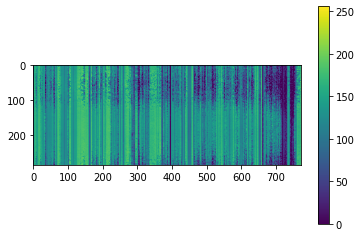

In [27]:
import matplotlib.pyplot as plt

plt.imshow(result)
plt.colorbar()
plt.show()

In [29]:
import concurrent.futures

In [30]:
def create_columns(path):
    processor_object = Processor()
    result = processor.create_columns(processor_object.process_file_in_path(path, 5), processor_object.PROCESSED_COL_NAMES[-1])
    return result

In [32]:
start = time.time()

result = np.zeros((288, 1))
i = 0
start_time = datetime.datetime.now().time()

with concurrent.futures.ProcessPoolExecutor(max_workers=6) as executor:
    for path, cols in zip(day_1_files, executor.map(create_columns, day_1_files)):
        print(cols)
            
done = time.time()
elapsed = done - start
print(elapsed)

with concurrent.futures.ProcessPoolExecutor() as executor:
        for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
            print('%d is prime: %s' % (number, prime))

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

array([], dtype=float64)

In [44]:
a = np.array([[1],[2],[3],[4]])
b = np.array([[1],[2],[3],[4]])

np.concatenate((a, b), axis=1)

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

In [26]:
import time
start = time.time()

time.sleep(10)  # or do something more productive

done = time.time()
elapsed = done - start
print(elapsed)

10.011995553970337


In [33]:
import concurrent.futures
import math

PRIMES = [
    112272535095293,
    112582705942171,
    112272535095293,
    115280095190773,
    115797848077099,
    1099726899285419]

def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False

    sqrt_n = int(math.floor(math.sqrt(n)))
    for i in range(3, sqrt_n + 1, 2):
        if n % i == 0:
            return False
    return True

with concurrent.futures.ProcessPoolExecutor() as executor:
    for number, prime in zip(PRIMES, executor.map(is_prime, PRIMES)):
        print('%d is prime: %s' % (number, prime))

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.